<h1> 1.Number of wheat on a 2 x 2 square chess board</h1>

In [70]:
import numpy as np
board_dimension = 4
placeholder_list = [1]
for _ in range(board_dimension-1):
    placeholder_list.append(2*placeholder_list[-1])
    
small_nd_board = np.array(placeholder_list)
print(small_nd_board)

[1 2 4 8]


<h1>2.Expansion to n × m mass </h1>

In [71]:
def chessboard_with_wheat(n: int, m: int) -> int:
    chessboard = np.zeros((n, m),dtype=np.uint64)
    cell_val = 1 #val at the current cell
    for row in range(n):
        for col in range(m):
            chessboard[row][col] = cell_val 
            cell_val = chessboard[row][col] * 2
    return chessboard        
result = chessboard_with_wheat(8, 8)

for i in result:
    print(i)

[  1   2   4   8  16  32  64 128]
[  256   512  1024  2048  4096  8192 16384 32768]
[  65536  131072  262144  524288 1048576 2097152 4194304 8388608]
[  16777216   33554432   67108864  134217728  268435456  536870912
 1073741824 2147483648]
[  4294967296   8589934592  17179869184  34359738368  68719476736
 137438953472 274877906944 549755813888]
[  1099511627776   2199023255552   4398046511104   8796093022208
  17592186044416  35184372088832  70368744177664 140737488355328]
[  281474976710656   562949953421312  1125899906842624  2251799813685248
  4503599627370496  9007199254740992 18014398509481984 36028797018963968]
[  72057594037927936  144115188075855872  288230376151711744
  576460752303423488 1152921504606846976 2305843009213693952
 4611686018427387904 9223372036854775808]


<h1>3.Total number of wheat </h1>

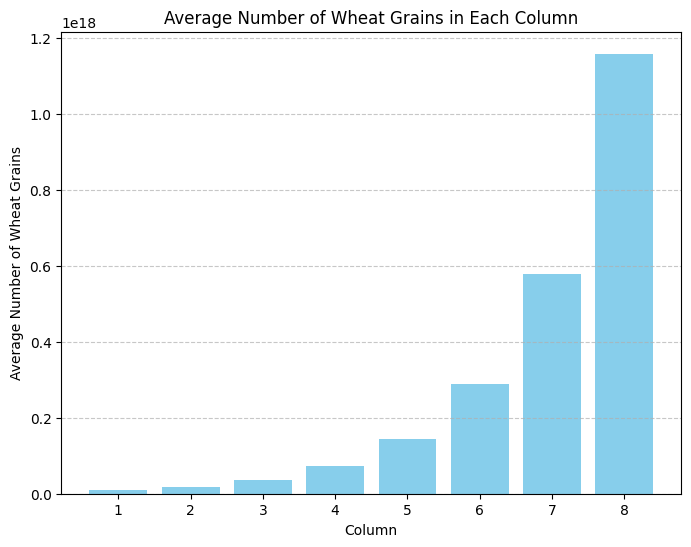

In [72]:
import matplotlib.pyplot as plt
average_per_column = np.mean(result, axis=0)
plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, 9), average_per_column, color='skyblue')
plt.title('Average Number of Wheat Grains in Each Column')
plt.xlabel('Column')
plt.ylabel('Average Number of Wheat Grains')
plt.xticks(np.arange(1, 9))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>4. Heat map of the number of wheat </h1>a

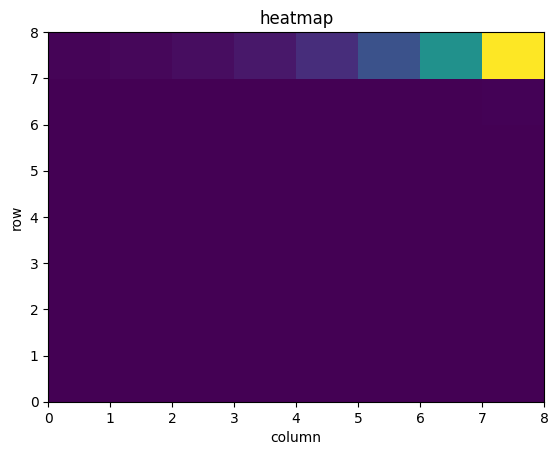

In [73]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(result)
plt.show()

<h1>5. How many times is the second half as long as the first half? </h1>

In [74]:
sum_first_half = np.sum(result[:4, :], axis=0)
sum_second_half = np.sum(result[4:, :], axis=0)

count_greater = np.sum(sum_second_half > sum_first_half)
print("Number of times the sum of wheat grains in the second half is greater than the first half:", count_greater)

Number of times the sum of wheat grains in the second half is greater than the first half: 8


<h1>6. Expansion to n × m mass by another calculation method </h1>

In [75]:
#append
def chessboard_with_wheat_append(n: int, m: int) -> np.ndarray:
    chessboard = np.array([1], dtype=np.uint64)
    for _ in range(1, n * m):
        chessboard = np.append(chessboard, 2 * chessboard[-1])
    return chessboard.reshape((n, m))

#broadcast
def chessboard_with_wheat_broadcast(n: int, m: int) -> np.ndarray:
    indices = np.arange(n * m)
    wheat_grains = 2 ** indices
    return wheat_grains.reshape((n, m))



<h1>7. Comparing calculation times</h1>

In [76]:
%timeit chessboard_original = chessboard_with_wheat(8, 8)

%timeit chessboard_append = chessboard_with_wheat_append(8, 8)

%timeit chessboard_broadcast = chessboard_with_wheat_broadcast(8, 8)


137 µs ± 2.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
209 µs ± 6.88 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.95 µs ± 523 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
